In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K

from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [5]:
df = pd.read_csv('golds.csv')

In [6]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,price
date,
2013-09-09,21250.0
2013-09-10,21050.0
2013-09-11,20800.0
2013-09-12,20400.0
2013-09-13,20050.0


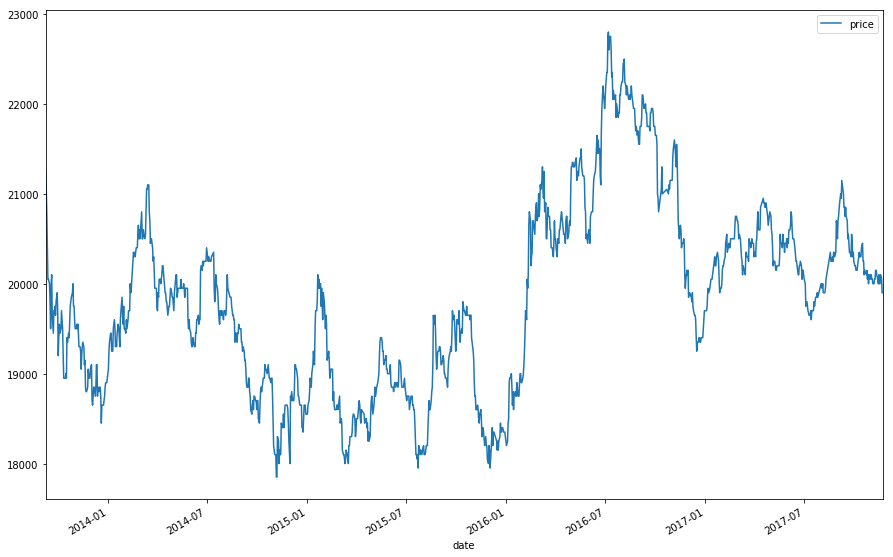

In [7]:
df.plot(figsize=(15,10))

In [8]:
df.describe()

,price
count,1249.000000
mean,19823.618895
std,1027.846751
min,17850.000000
25%,18950.000000
50%,19800.000000
75%,20450.000000
max,22800.000000


In [9]:
split_date = pd.Timestamp('10-01-2016')

In [10]:
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]

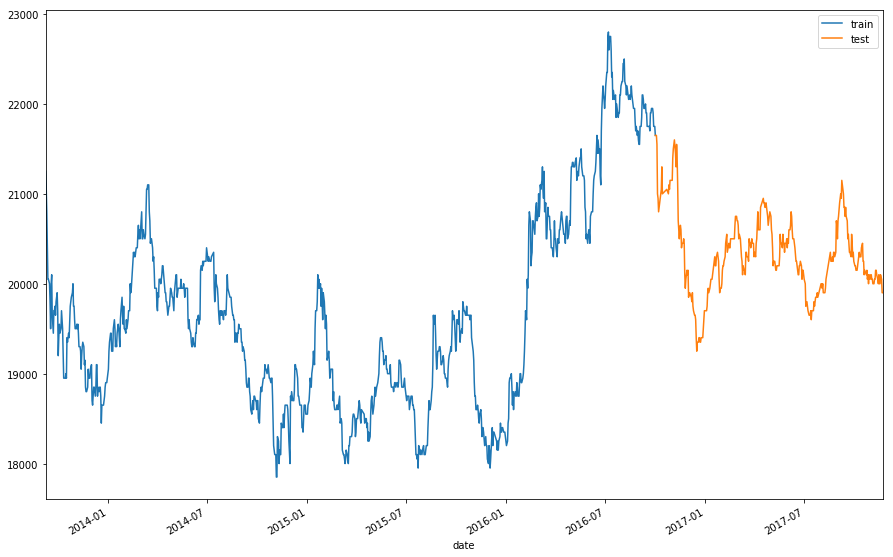

In [11]:
ax = train.plot()
test.plot(ax=ax, figsize=(15,10))
plt.legend(['train', 'test'])

In [12]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [13]:
train_sc[:4]

array([[0.68686869],
       [0.64646465],
       [0.5959596 ],
       [0.51515152]])

In [14]:
train[:4]

,price
date,
2013-09-09,21250.0
2013-09-10,21050.0
2013-09-11,20800.0
2013-09-12,20400.0


In [15]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [16]:
train_sc.shape

(918, 1)

In [17]:
X_train

array([[0.68686869],
       [0.64646465],
       [0.5959596 ],
       [0.51515152],
       [0.44444444],
       [0.44444444],
       [0.43434343],
       [0.39393939],
       [0.33333333],
       [0.43434343],
       [0.45454545],
       [0.36363636],
       [0.32323232],
       [0.37373737],
       [0.37373737],
       [0.38383838],
       [0.36363636],
       [0.39393939],
       [0.41414141],
       [0.37373737],
       [0.27272727],
       [0.31313131],
       [0.34343434],
       [0.32323232],
       [0.33333333],
       [0.37373737],
       [0.35353535],
       [0.33333333],
       [0.27272727],
       [0.22222222],
       [0.22222222],
       [0.22222222],
       [0.23232323],
       [0.22222222],
       [0.31313131],
       [0.3030303 ],
       [0.32323232],
       [0.31313131],
       [0.38383838],
       [0.39393939],
       [0.4040404 ],
       [0.41414141],
       [0.43434343],
       [0.38383838],
       [0.38383838],
       [0.35353535],
       [0.33333333],
       [0.333

In [18]:
y_train

array([[0.64646465],
       [0.5959596 ],
       [0.51515152],
       [0.44444444],
       [0.44444444],
       [0.43434343],
       [0.39393939],
       [0.33333333],
       [0.43434343],
       [0.45454545],
       [0.36363636],
       [0.32323232],
       [0.37373737],
       [0.37373737],
       [0.38383838],
       [0.36363636],
       [0.39393939],
       [0.41414141],
       [0.37373737],
       [0.27272727],
       [0.31313131],
       [0.34343434],
       [0.32323232],
       [0.33333333],
       [0.37373737],
       [0.35353535],
       [0.33333333],
       [0.27272727],
       [0.22222222],
       [0.22222222],
       [0.22222222],
       [0.23232323],
       [0.22222222],
       [0.31313131],
       [0.3030303 ],
       [0.32323232],
       [0.31313131],
       [0.38383838],
       [0.39393939],
       [0.4040404 ],
       [0.41414141],
       [0.43434343],
       [0.38383838],
       [0.38383838],
       [0.35353535],
       [0.33333333],
       [0.33333333],
       [0.343

In [19]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [20]:
X_train_t.shape

(917, 1, 1)

In [21]:
X_train_t

array([[[0.68686869]],

       [[0.64646465]],

       [[0.5959596 ]],

       [[0.51515152]],

       [[0.44444444]],

       [[0.44444444]],

       [[0.43434343]],

       [[0.39393939]],

       [[0.33333333]],

       [[0.43434343]],

       [[0.45454545]],

       [[0.36363636]],

       [[0.32323232]],

       [[0.37373737]],

       [[0.37373737]],

       [[0.38383838]],

       [[0.36363636]],

       [[0.39393939]],

       [[0.41414141]],

       [[0.37373737]],

       [[0.27272727]],

       [[0.31313131]],

       [[0.34343434]],

       [[0.32323232]],

       [[0.33333333]],

       [[0.37373737]],

       [[0.35353535]],

       [[0.33333333]],

       [[0.27272727]],

       [[0.22222222]],

       [[0.22222222]],

       [[0.22222222]],

       [[0.23232323]],

       [[0.22222222]],

       [[0.31313131]],

       [[0.3030303 ]],

       [[0.32323232]],

       [[0.31313131]],

       [[0.38383838]],

       [[0.39393939]],

       [[0.4040404 ]],

       [[0.41414

In [42]:
K.clear_session()
model = Sequential()

model.add(LSTM(4, input_shape=(1, 1)))

model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [56]:
history=model.fit(X_train_t, y_train,
          epochs=10, batch_size=1, verbose=1,callbacks=[TQDMNotebookCallback(leave_inner=True)])

Epoch 1/10


917/917 [==============================] - ETA: 31s - loss: 2.0475e-05 - acc: 0.0000e+00 - mean_squared_error: 2.0475e-0 - ETA: 5s - loss: 6.4947e-04 - acc: 0.0000e+00 - mean_squared_error: 6.4947e-0 - ETA: 5s - loss: 4.9190e-04 - acc: 0.0000e+00 - mean_squared_error: 4.9190e- - ETA: 4s - loss: 6.5185e-04 - acc: 0.0000e+00 - mean_squared_error: 6.5185e- - ETA: 4s - loss: 5.6109e-04 - acc: 0.0000e+00 - mean_squared_error: 5.6109e- - ETA: 3s - loss: 4.8183e-04 - acc: 0.0000e+00 - mean_squared_error: 4.8183e- - ETA: 3s - loss: 4.6143e-04 - acc: 0.0000e+00 - mean_squared_error: 4.6143e- - ETA: 3s - loss: 5.9910e-04 - acc: 0.0000e+00 - mean_squared_error: 5.9910e- - ETA: 3s - loss: 6.3072e-04 - acc: 0.0000e+00 - mean_squared_error: 6.3072e- - ETA: 3s - loss: 7.3282e-04 - acc: 0.0000e+00 - mean_squared_error: 7.3282e- - ETA: 3s - loss: 6.9412e-04 - acc: 0.0000e+00 - mean_squared_error: 6.9412e- - ETA: 3s - loss: 7.0099e-04 - acc: 0.0000e+00 - mean_squared_error: 7.0099e- - ETA: 3s - loss: 6.

917/917 [==============================] - ETA: 37s - loss: 8.7184e-06 - acc: 0.0000e+00 - mean_squared_error: 8.7184e-0 - ETA: 5s - loss: 5.5509e-04 - acc: 0.0000e+00 - mean_squared_error: 5.5509e-0 - ETA: 4s - loss: 9.2611e-04 - acc: 0.0000e+00 - mean_squared_error: 9.2611e- - ETA: 4s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.0011       - ETA: 4s - loss: 9.3570e-04 - acc: 0.0000e+00 - mean_squared_error: 9.3570e- - ETA: 3s - loss: 0.0010 - acc: 0.0000e+00 - mean_squared_error: 0.0010       - ETA: 3s - loss: 9.0905e-04 - acc: 0.0000e+00 - mean_squared_error: 9.0905e- - ETA: 3s - loss: 8.6695e-04 - acc: 0.0000e+00 - mean_squared_error: 8.6695e- - ETA: 3s - loss: 9.5645e-04 - acc: 0.0000e+00 - mean_squared_error: 9.5645e- - ETA: 3s - loss: 9.4064e-04 - acc: 0.0000e+00 - mean_squared_error: 9.4064e- - ETA: 3s - loss: 8.9481e-04 - acc: 0.0000e+00 - mean_squared_error: 8.9481e- - ETA: 3s - loss: 8.4156e-04 - acc: 0.0000e+00 - mean_squared_error: 8.4156e- - ETA: 2s - loss: 8.

917/917 [==============================] - ETA: 42s - loss: 6.7340e-07 - acc: 0.0000e+00 - mean_squared_error: 6.7340e-0 - ETA: 6s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.0012        - ETA: 5s - loss: 9.0894e-04 - acc: 0.0000e+00 - mean_squared_error: 9.0894e- - ETA: 4s - loss: 9.9983e-04 - acc: 0.0000e+00 - mean_squared_error: 9.9983e- - ETA: 4s - loss: 8.5901e-04 - acc: 0.0000e+00 - mean_squared_error: 8.5901e- - ETA: 3s - loss: 7.6278e-04 - acc: 0.0000e+00 - mean_squared_error: 7.6278e- - ETA: 3s - loss: 7.4113e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4113e- - ETA: 3s - loss: 7.2305e-04 - acc: 0.0000e+00 - mean_squared_error: 7.2305e- - ETA: 3s - loss: 7.8960e-04 - acc: 0.0000e+00 - mean_squared_error: 7.8960e- - ETA: 3s - loss: 8.3983e-04 - acc: 0.0000e+00 - mean_squared_error: 8.3983e- - ETA: 3s - loss: 9.5733e-04 - acc: 0.0000e+00 - mean_squared_error: 9.5733e- - ETA: 3s - loss: 8.9066e-04 - acc: 0.0000e+00 - mean_squared_error: 8.9066e- - ETA: 3s - loss: 8.

917/917 [==============================] - ETA: 36s - loss: 1.7719e-04 - acc: 0.0000e+00 - mean_squared_error: 1.7719e-0 - ETA: 5s - loss: 7.0355e-04 - acc: 0.0000e+00 - mean_squared_error: 7.0355e-0 - ETA: 4s - loss: 5.5747e-04 - acc: 0.0000e+00 - mean_squared_error: 5.5747e- - ETA: 4s - loss: 9.2633e-04 - acc: 0.0000e+00 - mean_squared_error: 9.2633e- - ETA: 3s - loss: 9.4067e-04 - acc: 0.0000e+00 - mean_squared_error: 9.4067e- - ETA: 3s - loss: 8.6565e-04 - acc: 0.0000e+00 - mean_squared_error: 8.6565e- - ETA: 3s - loss: 7.9907e-04 - acc: 0.0000e+00 - mean_squared_error: 7.9907e- - ETA: 3s - loss: 7.4315e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4315e- - ETA: 3s - loss: 7.6462e-04 - acc: 0.0000e+00 - mean_squared_error: 7.6462e- - ETA: 3s - loss: 7.4732e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4732e- - ETA: 3s - loss: 7.2140e-04 - acc: 0.0000e+00 - mean_squared_error: 7.2140e- - ETA: 3s - loss: 7.3470e-04 - acc: 0.0000e+00 - mean_squared_error: 7.3470e- - ETA: 3s - loss: 7.

917/917 [==============================] - ETA: 36s - loss: 4.0983e-05 - acc: 0.0000e+00 - mean_squared_error: 4.0983e-0 - ETA: 5s - loss: 7.7605e-04 - acc: 0.0000e+00 - mean_squared_error: 7.7605e-0 - ETA: 4s - loss: 6.1351e-04 - acc: 0.0000e+00 - mean_squared_error: 6.1351e- - ETA: 4s - loss: 5.5096e-04 - acc: 0.0000e+00 - mean_squared_error: 5.5096e- - ETA: 3s - loss: 6.2682e-04 - acc: 0.0000e+00 - mean_squared_error: 6.2682e- - ETA: 3s - loss: 6.9860e-04 - acc: 0.0000e+00 - mean_squared_error: 6.9860e- - ETA: 3s - loss: 7.9762e-04 - acc: 0.0000e+00 - mean_squared_error: 7.9762e- - ETA: 3s - loss: 7.4602e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4602e- - ETA: 3s - loss: 7.2617e-04 - acc: 0.0000e+00 - mean_squared_error: 7.2617e- - ETA: 3s - loss: 8.4862e-04 - acc: 0.0000e+00 - mean_squared_error: 8.4862e- - ETA: 3s - loss: 8.4087e-04 - acc: 0.0000e+00 - mean_squared_error: 8.4087e- - ETA: 3s - loss: 8.0805e-04 - acc: 0.0000e+00 - mean_squared_error: 8.0805e- - ETA: 3s - loss: 8.

917/917 [==============================] - ETA: 38s - loss: 2.0323e-04 - acc: 0.0000e+00 - mean_squared_error: 2.0323e-0 - ETA: 5s - loss: 0.0018 - acc: 0.0000e+00 - mean_squared_error: 0.0018        - ETA: 3s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0013 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0082 - mean_squared_error: 0.0011   - ETA: 2s - loss: 0.0011 - acc: 0.0074 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0067 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0061 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0056 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0052 - mean_

917/917 [==============================] - ETA: 37s - loss: 0.0022 - acc: 0.0000e+00 - mean_squared_error: 0.002 - ETA: 5s - loss: 8.8584e-04 - acc: 0.0000e+00 - mean_squared_error: 8.8584e- - ETA: 4s - loss: 9.1386e-04 - acc: 0.0000e+00 - mean_squared_error: 9.1386e- - ETA: 3s - loss: 7.5831e-04 - acc: 0.0000e+00 - mean_squared_error: 7.5831e- - ETA: 3s - loss: 6.3569e-04 - acc: 0.0000e+00 - mean_squared_error: 6.3569e- - ETA: 3s - loss: 6.9199e-04 - acc: 0.0000e+00 - mean_squared_error: 6.9199e- - ETA: 3s - loss: 7.5041e-04 - acc: 0.0000e+00 - mean_squared_error: 7.5041e- - ETA: 3s - loss: 7.8731e-04 - acc: 0.0000e+00 - mean_squared_error: 7.8731e- - ETA: 3s - loss: 8.2509e-04 - acc: 0.0000e+00 - mean_squared_error: 8.2509e- - ETA: 3s - loss: 8.2149e-04 - acc: 0.0000e+00 - mean_squared_error: 8.2149e- - ETA: 3s - loss: 7.6598e-04 - acc: 0.0000e+00 - mean_squared_error: 7.6598e- - ETA: 3s - loss: 7.6139e-04 - acc: 0.0000e+00 - mean_squared_error: 7.6139e- - ETA: 3s - loss: 7.3913e-04 

917/917 [==============================] - ETA: 35s - loss: 2.9102e-05 - acc: 0.0000e+00 - mean_squared_error: 2.9102e-0 - ETA: 5s - loss: 5.6009e-04 - acc: 0.0000e+00 - mean_squared_error: 5.6009e-0 - ETA: 4s - loss: 6.0926e-04 - acc: 0.0000e+00 - mean_squared_error: 6.0926e- - ETA: 4s - loss: 6.1784e-04 - acc: 0.0000e+00 - mean_squared_error: 6.1784e- - ETA: 4s - loss: 7.9180e-04 - acc: 0.0000e+00 - mean_squared_error: 7.9180e- - ETA: 3s - loss: 8.3903e-04 - acc: 0.0000e+00 - mean_squared_error: 8.3903e- - ETA: 3s - loss: 8.2030e-04 - acc: 0.0000e+00 - mean_squared_error: 8.2030e- - ETA: 3s - loss: 7.9829e-04 - acc: 0.0000e+00 - mean_squared_error: 7.9829e- - ETA: 3s - loss: 7.5404e-04 - acc: 0.0000e+00 - mean_squared_error: 7.5404e- - ETA: 3s - loss: 7.4378e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4378e- - ETA: 3s - loss: 7.4706e-04 - acc: 0.0000e+00 - mean_squared_error: 7.4706e- - ETA: 3s - loss: 8.1804e-04 - acc: 0.0000e+00 - mean_squared_error: 8.1804e- - ETA: 2s - loss: 9.

917/917 [==============================] - ETA: 33s - loss: 8.9514e-04 - acc: 0.0000e+00 - mean_squared_error: 8.9514e-0 - ETA: 5s - loss: 9.4769e-04 - acc: 0.0000e+00 - mean_squared_error: 9.4769e-0 - ETA: 4s - loss: 7.6528e-04 - acc: 0.0400 - mean_squared_error: 7.6528e-04   - ETA: 4s - loss: 9.1515e-04 - acc: 0.0250 - mean_squared_error: 9.1515e- - ETA: 3s - loss: 7.4407e-04 - acc: 0.0185 - mean_squared_error: 7.4407e- - ETA: 3s - loss: 6.4048e-04 - acc: 0.0147 - mean_squared_error: 6.4048e- - ETA: 3s - loss: 6.0582e-04 - acc: 0.0123 - mean_squared_error: 6.0582e- - ETA: 3s - loss: 6.4155e-04 - acc: 0.0105 - mean_squared_error: 6.4155e- - ETA: 3s - loss: 7.3465e-04 - acc: 0.0093 - mean_squared_error: 7.3465e- - ETA: 3s - loss: 6.8012e-04 - acc: 0.0081 - mean_squared_error: 6.8012e- - ETA: 3s - loss: 7.0317e-04 - acc: 0.0074 - mean_squared_error: 7.0317e- - ETA: 3s - loss: 7.0498e-04 - acc: 0.0067 - mean_squared_error: 7.0498e- - ETA: 3s - loss: 7.1617e-04 - acc: 0.0061 - mean_square

917/917 [==============================] - ETA: 37s - loss: 1.2945e-04 - acc: 0.0000e+00 - mean_squared_error: 1.2945e-0 - ETA: 5s - loss: 0.0014 - acc: 0.0000e+00 - mean_squared_error: 0.0014        - ETA: 4s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 9.5081e-04 - acc: 0.0000e+00 - mean_squared_error: 9.5081e- - ETA: 3s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.0011       - ETA: 3s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 3s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0012 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - loss: 0.0011 - acc: 0.0000e+00 - mean_squared_error: 0.00 - ETA: 2s - lo

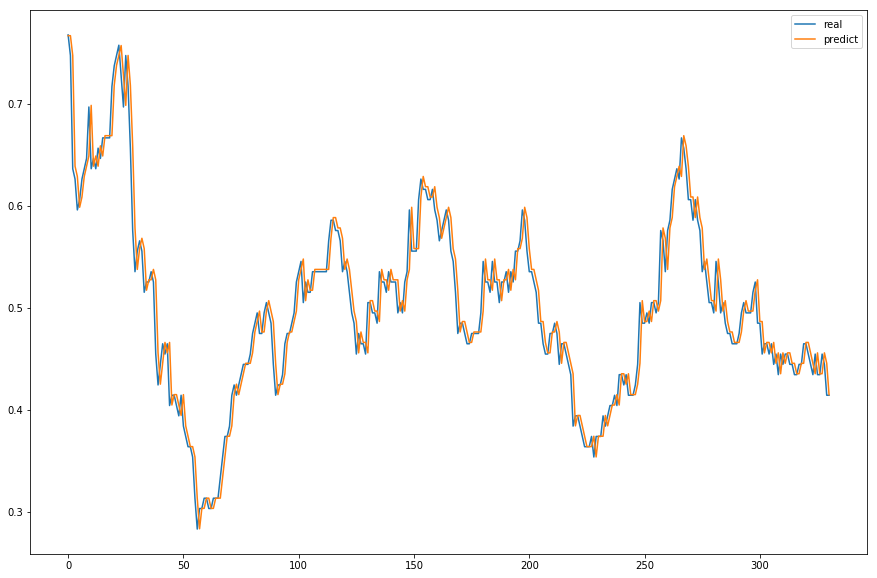

In [54]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [52]:
(history.history['mean_squared_error'])

[0.04566885728673444,
 0.007074272124612683,
 0.0009897478599307159,
 0.0008799752390266303,
 0.0008932792917280908,
 0.0008785831564046732,
 0.0009083369654099846,
 0.0008973047135950754,
 0.0008813193813077343,
 0.000893076591988589]

In [57]:
y_test=sc.inverse_transform(y_test)
print(y_test)

[[21650.]
 [21550.]
 [21000.]
 [20950.]
 [20800.]
 [20850.]
 [20950.]
 [21000.]
 [21050.]
 [21300.]
 [21000.]
 [21050.]
 [21000.]
 [21100.]
 [21050.]
 [21150.]
 [21150.]
 [21150.]
 [21150.]
 [21400.]
 [21500.]
 [21550.]
 [21600.]
 [21450.]
 [21300.]
 [21550.]
 [21400.]
 [21100.]
 [20700.]
 [20500.]
 [20600.]
 [20650.]
 [20600.]
 [20400.]
 [20450.]
 [20450.]
 [20500.]
 [20450.]
 [20100.]
 [19950.]
 [20050.]
 [20150.]
 [20100.]
 [20150.]
 [19850.]
 [19900.]
 [19900.]
 [19850.]
 [19800.]
 [19900.]
 [19750.]
 [19700.]
 [19650.]
 [19650.]
 [19600.]
 [19400.]
 [19250.]
 [19350.]
 [19350.]
 [19400.]
 [19400.]
 [19350.]
 [19350.]
 [19400.]
 [19400.]
 [19400.]
 [19500.]
 [19600.]
 [19700.]
 [19700.]
 [19750.]
 [19900.]
 [19950.]
 [19900.]
 [19950.]
 [20000.]
 [20050.]
 [20050.]
 [20050.]
 [20100.]
 [20200.]
 [20250.]
 [20300.]
 [20200.]
 [20200.]
 [20300.]
 [20350.]
 [20300.]
 [20250.]
 [20050.]
 [19900.]
 [19950.]
 [19950.]
 [20000.]
 [20150.]
 [20200.]
 [20200.]
 [20250.]
 [20300.]
 [20450.]


In [31]:
print(y_pred)

[[18333.566]
 [18333.566]
 [18323.297]
 [18264.137]
 [18258.535]
 [18241.52 ]
 [18247.229]
 [18258.535]
 [18264.137]
 [18269.7  ]
 [18296.963]
 [18264.137]
 [18269.7  ]
 [18264.137]
 [18275.227]
 [18269.7  ]
 [18280.717]
 [18280.717]
 [18280.717]
 [18280.717]
 [18307.61 ]
 [18318.105]
 [18323.297]
 [18328.451]
 [18312.875]
 [18296.963]
 [18323.297]
 [18307.61 ]
 [18275.227]
 [18229.994]
 [18206.523]
 [18218.33 ]
 [18224.18 ]
 [18218.33 ]
 [18194.578]
 [18200.568]
 [18200.568]
 [18206.523]
 [18200.568]
 [18157.932]
 [18139.162]
 [18151.707]
 [18164.123]
 [18157.932]
 [18164.123]
 [18126.486]
 [18132.84 ]
 [18132.84 ]
 [18126.486]
 [18120.102]
 [18132.84 ]
 [18113.686]
 [18107.24 ]
 [18100.762]
 [18100.762]
 [18094.256]
 [18067.926]
 [18047.877]
 [18061.271]
 [18061.271]
 [18067.926]
 [18067.926]
 [18061.271]
 [18061.271]
 [18067.926]
 [18067.926]
 [18067.926]
 [18081.148]
 [18094.256]
 [18107.24 ]
 [18107.24 ]
 [18113.686]
 [18132.84 ]
 [18139.162]
 [18132.84 ]
 [18139.162]
 [18145.451]